In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [8]:
police_shootings=pd.read_csv("fatal-police-shootings-data.csv")
cities=pd.read_csv("cities.csv")

In [9]:
police_shootings.head()
police_shootings.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
police_shootings.replace(to_replace = ['B'], value = ['Black'], inplace = True)
police_shootings.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
police_shootings.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
police_shootings.replace(to_replace = ['O'], value = ['Other'], inplace = True)
police_shootings.replace(to_replace = ['W'], value = ['White '], inplace = True)

AttributeError: 'DataFrame' object has no attribute 'police_shootings'

In [6]:
missing_percentage=police_shootings.isna().sum()*100/police_shootings.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

In [7]:
police_shootings.dropna(inplace=True)

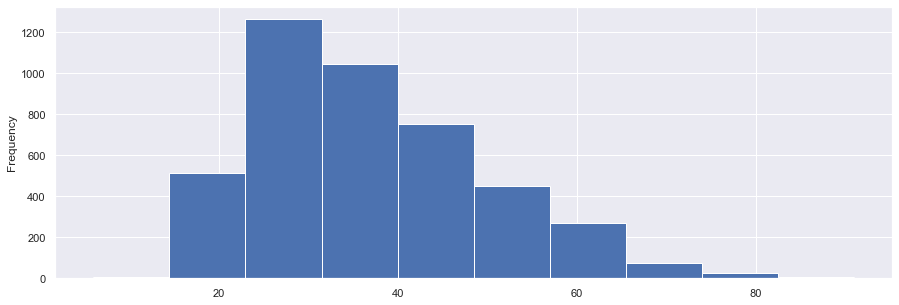

In [8]:
sns.set(rc={'figure.figsize':(15,5)})
police_shootings["age"].plot.hist()

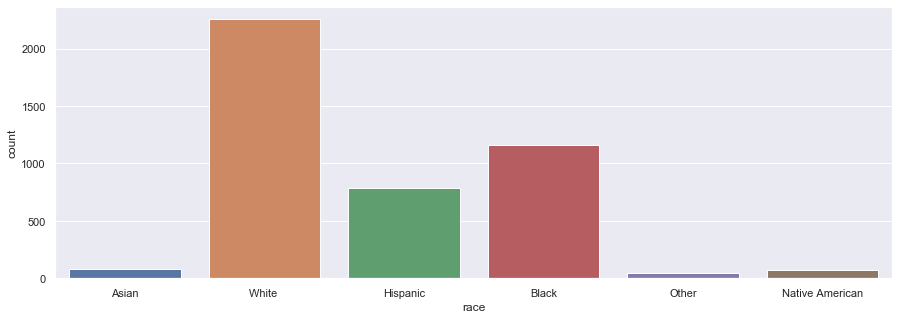

In [9]:
sns.countplot(x = "race", data = police_shootings)

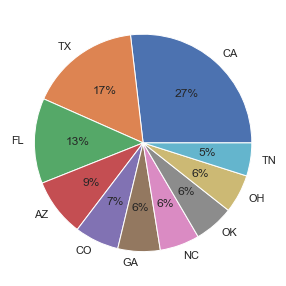

In [10]:
shootout_by_states = police_shootings['state'].value_counts()[:10]
shootout_by_states = pd.DataFrame(shootout_by_states)
shootout_by_states=shootout_by_states.reset_index()
plt.pie(shootout_by_states["state"],labels=shootout_by_states["index"],autopct="%1.0f%%")
plt.show()

In [11]:
shootout_by_states

index  state
0    CA    623
1    TX    383
2    FL    294
3    AZ    200
4    CO    153
5    GA    146
6    NC    137
7    OK    137
8    OH    133
9    TN    114

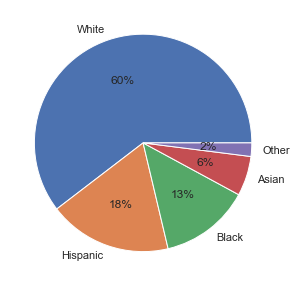

In [12]:
#Informacion obtenida de https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States
#USA population (2019) = 328.2 million
dict_ = {'White': 60.4, 'Hispanic': 18.3, 'Black': 13.4,'Asian':5.9,'Other':2.0}
census = pd.DataFrame(dict_.items(), columns=['Race', 'Population %'])
census['Population (millions)'] = census['Population %']*3.282
census
plt.pie(census["Population %"],labels=census["Race"],autopct="%1.0f%%")
plt.show()

In [16]:
pscities = pd.merge(police_shootings, cities, on=["city","state"])
pscities.to_csv("latlongpolice.csv")

In [21]:
pscities

id                  name        date   manner_of_death    armed   age  \
0        3            Tim Elliot  2015-01-02              shot      gun  53.0   
1     5685       Kathryn R. Hale  2020-03-24              shot  vehicle  32.0   
2        4      Lewis Lee Lembke  2015-01-02              shot      gun  47.0   
3      890  Phyllis Ilene Jepsen  2015-10-02              shot    knife  55.0   
4        5    John Paul Quintero  2015-01-03  shot and Tasered  unarmed  23.0   
...    ...                   ...         ...               ...      ...   ...   
4373  5908          Jarrid Hurst  2020-06-07              shot    knife  35.0   
4374  5913  Gregorio Cruz Vanloo  2020-06-11              shot      gun  28.0   
4375  5914      Mason James Lira  2020-06-11              shot      gun  26.0   
4376  5925        Caine Van Pelt  2020-06-12              shot      gun  23.0   
4377  5924        Nicholas Hirsh  2020-06-15              shot      gun  31.0   

     gender      race           city state  signs_of_mental_illness  \
0         M     Asian        Shelton    WA                     True   
1         F    White         Shelton    WA                    False   
2         M    White           Aloha    OR                    False   
3         F    White           Aloha    OR                     True   
4         M  Hispanic        Wichita    KS                    False   
...     ...       ...            ...   ...                      ...   
4373      M    White        Industry    CA                     True   
4374      M    White   DeKalb County    TN                    False   
4375      M    White     Paso Robles    CA                     True   
4376      M     Black    Crown Point    IN                    False   
4377      M    White        Lawrence    KS                    False   

     threat_level         flee  body_camera  Unnamed: 0               address  \
0          attack  Not fleeing        False           0        Shelton,WA,USA   
1          attack          Car        False           0        Shelton,WA,USA   
2          attack  Not fleeing        False           1          Aloha,OR,USA   
3           other  Not fleeing        False           1          Aloha,OR,USA   
4           other  Not fleeing        False           2        Wichita,KS,USA   
...           ...          ...          ...         ...                   ...   
4373        other  Not fleeing        False        2781       Industry,CA,USA   
4374        other        Other        False        2783  DeKalb County,TN,USA   
4375       attack         Foot        False        2784    Paso Robles,CA,USA   
4376       attack          Car        False        2785    Crown Point,IN,USA   
4377       attack          Car        False        2786       Lawrence,KS,USA   

                            geom   latitude   longitude  
0     (47.2150945, -123.1007066)  47.215094 -123.100707  
1     (47.2150945, -123.1007066)  47.215094 -123.100707  
2     (45.4942838, -122.8670451)  45.494284 -122.867045  
3     (45.4942838, -122.8670451)  45.494284 -122.867045  
4      (37.6922361, -97.3375448)  37.692236  -97.337545  
...                          ...        ...         ...  
4373  (34.0197335, -117.9586754)  34.019734 -117.958675  
4374     (35.9804643, -85.83965)  35.980464  -85.839650  
4375  (35.6267654, -120.6912456)  35.626765 -120.691246  
4376   (41.4169806, -87.3653136)  41.416981  -87.365314  
4377   (38.9719384, -95.2359496)  38.971938  -95.235950  

[4378 rows x 19 columns]

In [20]:
cities

Unnamed: 0           city state               address  \
0              0        Shelton    WA        Shelton,WA,USA   
1              1          Aloha    OR          Aloha,OR,USA   
2              2        Wichita    KS        Wichita,KS,USA   
3              3  San Francisco    CA  San Francisco,CA,USA   
4              4          Evans    CO          Evans,CO,USA   
...          ...            ...   ...                   ...   
2758        2783  DeKalb County    TN  DeKalb County,TN,USA   
2759        2784    Paso Robles    CA    Paso Robles,CA,USA   
2760        2785    Crown Point    IN    Crown Point,IN,USA   
2761        2786       Lawrence    KS       Lawrence,KS,USA   
2762        2787     Beach Park    IL     Beach Park,IL,USA   

                            geom   latitude   longitude  
0     (47.2150945, -123.1007066)  47.215094 -123.100707  
1     (45.4942838, -122.8670451)  45.494284 -122.867045  
2      (37.6922361, -97.3375448)  37.692236  -97.337545  
3     (37.7790262, -122.4199061)  37.779026 -122.419906  
4     (40.3763701, -104.6921874)  40.376370 -104.692187  
...                          ...        ...         ...  
2758     (35.9804643, -85.83965)  35.980464  -85.839650  
2759  (35.6267654, -120.6912456)  35.626765 -120.691246  
2760   (41.4169806, -87.3653136)  41.416981  -87.365314  
2761   (38.9719384, -95.2359496)  38.971938  -95.235950  
2762   (42.4222435, -87.8572955)  42.422244  -87.857295  

[2763 rows x 7 columns]

In [18]:
pscities["location"]=[pscities["latitude"],pscities["longitude"]]

ValueError: Length of values does not match length of index

In [14]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

In [15]:
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [179]:
state_count = police_shootings.groupby("state")
state_count = state_count["id"].count()
state_count = state_count.reset_index().rename(columns={"id":"count"})
state_count.head()

state  count
0    AK     39
1    AL    104
2    AR     83
3    AZ    254
4    CA    799

In [166]:
countmap = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_count,
    columns=['state', 'count'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Incidents '
).add_to(countmap)

folium.LayerControl().add_to(countmap)

countmap

In [41]:
formap = pscities[["name","city","longitude","latitude"]]

areamap = folium.Map(location=[32, -100], tiles='openstreetmap', zoom_start=3)

mc = MarkerCluster()

for i, row in formap.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(folium.Marker([row['latitude'], row['longitude']], popup=[row['city'],row["name"]]))

areamap.add_child(mc)
areamap